# Exploratory Data Analysis - Gabrielle Nyirjesy
## Data Import and Initial Analysis

In [40]:
# Read in packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#Read in data
profile = pd.read_csv("../../data/profileData.csv")
profile.head()

,float,cycleNumber,date,PRES,PSAL,TEMP,BBP700,CHLA
0,1902303,1,2021-05-06 02:03:16,3,35.539001,12.378333,0.001788,0.695875
1,1902303,1,2021-05-06 02:03:16,4,35.539001,12.378333,0.001788,0.695875
2,1902303,1,2021-05-06 02:03:16,6,35.539001,12.378667,0.001788,0.696499
3,1902303,1,2021-05-06 02:03:16,8,35.539001,12.379000,0.001789,0.716489
4,1902303,1,2021-05-06 02:03:16,10,35.539001,12.379000,0.001790,0.715552


In [4]:
satData = pd.read_csv("../../data/satData.csv")
satData.head()

,float,cycleNumber,date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,LT_SAT_SST_MED,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED
0,1902303,1,2021-05-06 02:03:16,49.236,-14.742,-4539.0,12.451869,0.435093,0.003340,2.156995,12.796509,0.253809,0.401662,0.000819,0.002213
1,1902303,2,2021-05-06 19:32:57,49.096,-14.617,-4612.0,12.466026,0.782180,0.003081,2.214400,12.673785,0.222806,0.398969,0.000793,0.002114
2,1902303,3,2021-05-07 20:05:38,48.914,-14.606,-4700.0,12.424099,0.458020,0.003185,2.211703,12.808284,0.279028,0.428079,0.000752,0.002105
3,1902303,4,2021-05-08 22:42:52,48.794,-14.689,-4753.0,12.374519,0.378064,0.001767,2.200517,13.010804,0.278832,0.422287,0.000679,0.002087
4,1902303,5,2021-05-09 20:29:00,48.719,-14.795,-4765.0,12.204494,0.411479,0.001677,2.232417,12.931680,0.334429,0.419105,0.000776,0.002090


In [5]:
sat_profile_combo = profile.merge(satData, on=['float','cycleNumber'], how='left')

In [6]:
print(len(sat_profile_combo))
print(len(satData))
print(len(profile))

37469410
66271
37469410


In [7]:
sat_profile_combo.columns

Index(['float', 'cycleNumber', 'date_x', 'PRES', 'PSAL', 'TEMP', 'BBP700',
       'CHLA', 'date_y', 'latitude', 'longitude', 'elevation', 'MO_SAT_SST',
       'MO_SAT_CHL', 'MO_SAT_BBP', 'LT_SAT_SST_SD', 'LT_SAT_SST_MED',
       'LT_SAT_CHL_SD', 'LT_SAT_CHL_MED', 'LT_SAT_BBP_SD', 'LT_SAT_BBP_MED'],
      dtype='object')

In [13]:
sat_profile_combo.describe()

,float,cycleNumber,PRES,PSAL,TEMP,BBP700,CHLA,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,LT_SAT_SST_MED,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED
count,3.746941e+07,3.746941e+07,3.746941e+07,3.660242e+07,3.745701e+07,3.721008e+07,3.723590e+07,3.746941e+07,3.746941e+07,3.746941e+07,3.538632e+07,3.004091e+07,2.995729e+07,3.574349e+07,3.574402e+07,3.746730e+07,3.574244e+07,3.574191e+07,3.574244e+07
mean,6.143645e+06,1.104100e+02,4.312198e+02,3.526833e+01,8.318618e+00,6.421931e-04,6.600038e-02,-9.581369e-01,-1.038124e+01,-3.642419e+03,1.447545e+01,2.972434e-01,2.220812e-03,1.971902e+00,1.370121e+01,2.371329e-01,2.314963e-01,7.529673e-04,2.139204e-03
std,1.172260e+06,8.802535e+01,2.898204e+02,1.505313e+00,6.720189e+00,3.473924e-03,2.394648e-01,4.596353e+01,8.570622e+01,1.222541e+03,9.642916e+00,5.217406e-01,1.136701e-03,1.065363e+00,9.674248e+00,4.208786e-01,1.663070e-01,5.237967e-04,5.379965e-04
min,1.902303e+06,1.000000e+00,0.000000e+00,1.628877e+01,-1.860345e+00,-7.762093e-04,-1.569500e-01,-7.564700e+01,-1.799850e+02,-9.614000e+03,-1.795000e+00,1.392376e-02,2.500413e-05,5.017424e-02,-1.437765e+00,5.114658e-03,2.333173e-02,1.426512e-04,1.000724e-03
25%,5.904841e+06,4.000000e+01,1.760000e+02,3.439201e+01,2.825333e+00,2.632409e-04,3.671831e-17,-4.744732e+01,-6.000793e+01,-4.580000e+03,5.517389e+00,1.028216e-01,1.588029e-03,1.147850e+00,4.687107e+00,4.459049e-02,1.196504e-01,3.033652e-04,1.683976e-03
50%,6.901181e+06,8.900000e+01,3.850000e+02,3.473279e+01,6.232000e+00,3.382371e-04,4.800000e-03,7.454133e-01,-4.099000e+00,-3.689000e+03,1.365272e+01,1.705577e-01,1.896518e-03,1.722054e+00,1.261852e+01,9.644500e-02,1.717985e-01,6.719117e-04,2.140890e-03
75%,6.901770e+06,1.580000e+02,6.800000e+02,3.525596e+01,1.343230e+01,4.639434e-04,3.240000e-02,3.930600e+01,3.893038e+01,-2.785000e+03,2.427697e+01,3.210779e-01,2.541776e-03,2.356982e+00,2.207148e+01,2.642693e-01,3.020237e-01,1.027908e-03,2.488701e-03
max,7.901001e+06,4.540000e+02,1.119000e+03,4.072763e+01,3.204117e+01,8.411027e-02,2.136333e+01,7.875900e+01,1.799910e+02,-5.400000e+01,3.268228e+01,2.289198e+01,2.581552e-02,6.178847e+00,3.056390e+01,1.007501e+01,1.497630e+00,1.081534e-02,5.745649e-03


In [23]:
#convert date column to datetime object and remove duplicate date column
sat_profile_combo['date_x'] = pd.to_datetime(sat_profile_combo['date_x'])
sat_profile_combo = sat_profile_combo.drop('date_y', axis=1)

In [4]:
globalFloatData = pd.read_csv("../../data/globalFloatData.csv")
globalFloatData.head()

,float,date,latitude,longitude
0,1902303,2021-05-06 02:03:16,49.236,-14.742
1,1902303,2021-05-06 19:32:57,49.096,-14.617
2,1902303,2021-05-07 20:05:38,48.914,-14.606
3,1902303,2021-05-08 22:42:52,48.794,-14.689
4,1902303,2021-05-09 20:29:00,48.719,-14.795


In [5]:
df_2902120 = pd.read_csv("../../data/2902120.csv")
df_2902120.head()


,date,date_adj,basin,float,cycleNumber,longitude,latitude,elevation,shift,PRES,...,DOXY,PSAL,TEMP,jDay,timeseries,floatID,minJday,maxJday,maxDiff,perCoastal
0,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,1,...,204.074387,36.477667,27.612666,69,1,2902120_1,69,359,10,0
1,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,10,...,204.189794,36.485334,27.246667,69,1,2902120_1,69,359,10,0
2,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,102,...,33.288569,35.854167,23.052499,69,1,2902120_1,69,359,10,0
3,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,103,...,28.155571,35.837334,22.889666,69,1,2902120_1,69,359,10,0
4,2014-03-10 11:25:00,2014-03-10 11:25:00,Arabian,2902120,1,67.574073,14.979008,-3953,0,108,...,23.022574,35.773333,22.395333,69,1,2902120_1,69,359,10,0


In [6]:
df_2902120_interp = pd.read_csv("../../data/2902120_interp.csv")
df_2902120_interp.head()

,jDay,PRES,CHLA
0,1,0,0.546405
1,1,1,0.546405
2,1,2,0.546405
3,1,3,0.546405
4,1,4,0.546405


### Connections

In [7]:
df_2902120.shape

(29540, 28)

In [8]:
profile.shape

(37469410, 8)

In [9]:
profile['float'].value_counts()[2902120]
#The 2902120 dataset is a subset of the float profiles dataset

29540

### Examine profiles data

In [10]:
#Find the number of floats
profile['float'].nunique()

569

In [11]:
# Does each float encompass the whole time period
print(profile['date'].min())
print(profile['date'].max())

2010-06-01 16:28:06
2022-05-23 11:34:00


In [12]:
profile['float'].value_counts().mean()
#On average, there are 65851 measurements for each flot

65851.33567662566

In [13]:
profile.dtypes

float            int64
cycleNumber      int64
date            object
PRES             int64
PSAL           float64
TEMP           float64
BBP700         float64
CHLA           float64
dtype: object

In [14]:
#convert date column to datetime object
profile['date'] = pd.to_datetime(profile['date'])

In [15]:
profile.dtypes

float                   int64
cycleNumber             int64
date           datetime64[ns]
PRES                    int64
PSAL                  float64
TEMP                  float64
BBP700                float64
CHLA                  float64
dtype: object

In [16]:
profile['year'] = pd.DatetimeIndex(profile['date']).year

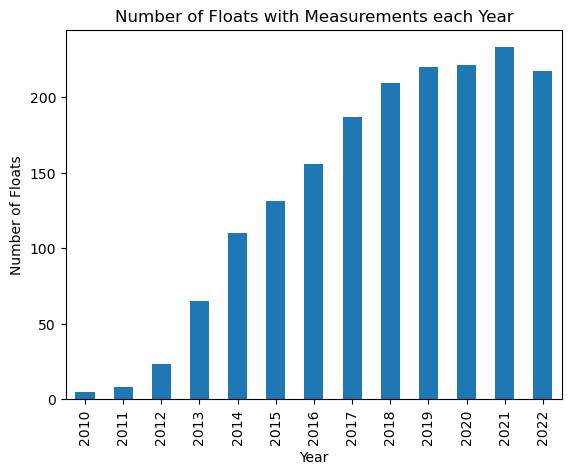

In [17]:
#How many floats have measurements each year?
year_count = profile[['year','float']].groupby('year').nunique()
year_count.plot(kind='bar', legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of Floats')
_ = plt.title('Number of Floats with Measurements each Year')
plt.show()

In [18]:
profile['float'].value_counts()

3901498    329728
6901183    328520
6902735    323890
6901492    323848
3901531    311602
            ...  
5904764       508
2902113       497
5905074       488
2902161       281
6900877        51
Name: float, Length: 569, dtype: int64

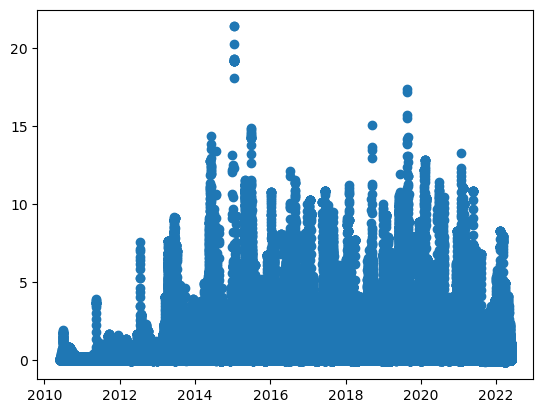

In [19]:
plt.scatter(profile['date'],profile['CHLA'])

In [20]:
profile_subset = profile[profile['float'].isin(list(profile['float'].value_counts().reset_index()['index'][0:1]))]

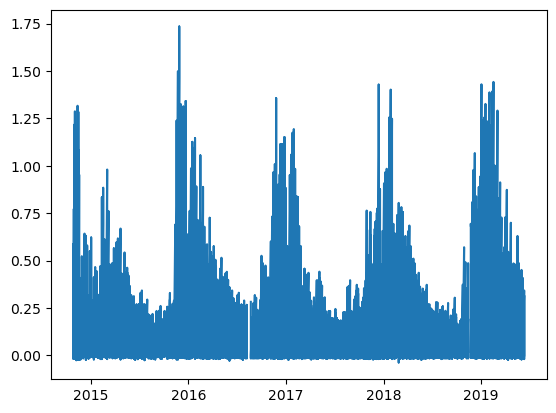

In [21]:
plt.plot(profile_subset['date'],profile_subset['CHLA'])

In [22]:
profile_subset.head()

,float,cycleNumber,date,PRES,PSAL,TEMP,BBP700,CHLA,year
3059339,3901498,1,2014-10-26 11:31:00,1,35.217971,13.420418,0.001226,0.408,2014
3059340,3901498,1,2014-10-26 11:31:00,2,35.217971,13.420418,0.001226,0.408,2014
3059341,3901498,1,2014-10-26 11:31:00,3,35.217971,13.420418,0.001226,0.408,2014
3059342,3901498,1,2014-10-26 11:31:00,4,35.217971,13.417994,0.001229,0.408,2014
3059343,3901498,1,2014-10-26 11:31:00,5,35.217971,13.413690,0.001233,0.408,2014


In [23]:
profile_subset_PRES = profile[profile['PRES'] == 1]

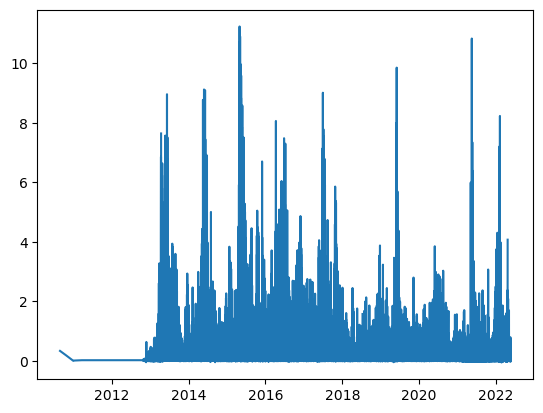

In [24]:
profile_subset_PRES = profile_subset_PRES.sort_values('date')
plt.plot(profile_subset_PRES['date'],profile_subset_PRES['CHLA'])

In [25]:
profile_subset_PRES.head(20)

,float,cycleNumber,date,PRES,PSAL,TEMP,BBP700,CHLA,year
16768570,6900796,10,2010-08-27 13:37:52,1,35.166335,10.717800,0.001488,0.33840,2010
16819836,6900797,16,2010-10-24 21:22:24,1,35.168500,8.523800,0.000965,0.18720,2010
16820041,6900797,23,2011-01-01 05:53:38,1,35.191601,5.728100,0.000452,0.00360,2011
16820109,6900797,24,2011-01-10 22:08:04,1,35.161334,5.358967,0.000420,0.01440,2011
16769394,6900796,31,2011-03-23 05:49:49,1,35.082334,3.253000,0.000370,0.02520,2011
19664710,6901473,1,2012-10-24 14:31:00,1,37.427966,26.955873,0.000583,0.02555,2012
19782525,6901474,1,2012-10-24 14:37:00,1,37.435958,26.947082,0.000548,0.03285,2012
19559562,6901472,1,2012-10-24 14:45:00,1,37.426029,26.960491,0.000549,0.03600,2012
19868068,6901475,1,2012-10-25 14:33:00,1,37.459102,26.988420,0.000486,0.03600,2012
19782956,6901474,2,2012-10-25 14:37:00,1,37.427368,26.946236,0.000537,0.03285,2012


### Satellite Data

In [26]:
satData['float'].value_counts()

6901181    436
6901654    411
6901516    399
6901492    397
3901498    385
          ... 
5904764      1
5906499      1
6902546      1
5906493      1
5905074      1
Name: float, Length: 569, dtype: int64

In [27]:
print(satData.dtypes)

float               int64
cycleNumber         int64
date               object
latitude          float64
longitude         float64
elevation         float64
MO_SAT_SST        float64
MO_SAT_CHL        float64
MO_SAT_BBP        float64
LT_SAT_SST_SD     float64
LT_SAT_SST_MED    float64
LT_SAT_CHL_SD     float64
LT_SAT_CHL_MED    float64
LT_SAT_BBP_SD     float64
LT_SAT_BBP_MED    float64
dtype: object


In [28]:
#convert date column to datetime object
satData['date'] = pd.to_datetime(satData['date'])

In [29]:
#Look at float with most data points
satData_subset = satData[satData['float'] == 6901181]
#Look at float with 2nd most data points
satData_subset2 = satData[satData['float'] == 6901654]
satData_subset3 = satData[satData['float'] == 6901516]

In [30]:
satData_subset = satData_subset.sort_values('date')
satData_subset2 = satData_subset2.sort_values('date')
satData_subset3 = satData_subset3.sort_values('date')

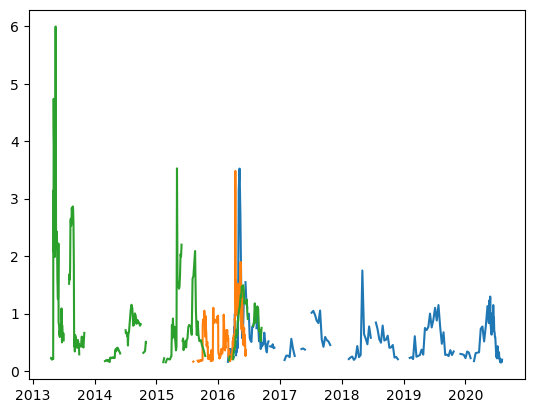

In [31]:
plt.plot(satData_subset['date'], satData_subset['MO_SAT_CHL'])
plt.plot(satData_subset2['date'], satData_subset2['MO_SAT_CHL'])
plt.plot(satData_subset3['date'], satData_subset3['MO_SAT_CHL'])

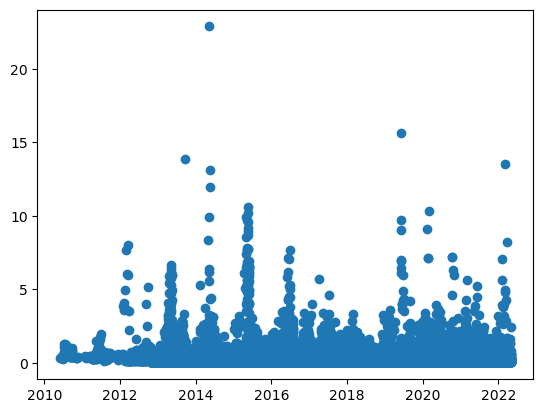

In [32]:
plt.scatter(satData['date'], satData['MO_SAT_CHL'])

In [33]:
satData_subset.head()

,float,cycleNumber,date,latitude,longitude,elevation,MO_SAT_SST,MO_SAT_CHL,MO_SAT_BBP,LT_SAT_SST_SD,LT_SAT_SST_MED,LT_SAT_CHL_SD,LT_SAT_CHL_MED,LT_SAT_BBP_SD,LT_SAT_BBP_MED
36049,6901181,2,2015-11-13 11:37:00,51.116337,-43.539548,-4237.0,11.481727,NaN,NaN,2.689946,11.194081,0.414229,0.468797,0.001251,0.002106
36050,6901181,3,2015-11-14 10:54:00,51.142575,-43.319909,-4329.0,NaN,NaN,NaN,2.703983,11.316002,0.391052,0.481335,0.001098,0.002193
36051,6901181,5,2015-11-15 10:50:00,51.074151,-43.055175,-4386.0,10.315758,NaN,NaN,2.821953,11.212473,0.730957,0.468856,0.001082,0.002041
36052,6901181,7,2015-11-16 10:58:00,50.938443,-42.853655,-4369.0,NaN,NaN,NaN,2.790219,11.430513,0.951431,0.447406,0.001145,0.002049
36053,6901181,9,2015-11-17 10:44:00,50.727299,-42.732193,-4298.5,9.693849,NaN,NaN,2.884290,11.467892,1.324115,0.457983,0.001061,0.002113


In [34]:
#Fill N/A with zeros
satData_subset = satData_subset.fillna(0)

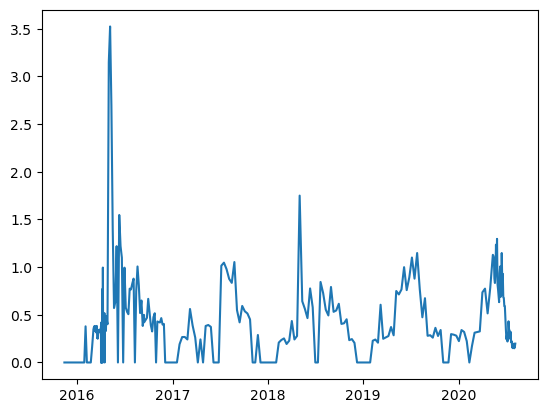

In [35]:
plt.plot(satData_subset['date'], satData_subset['MO_SAT_CHL'])

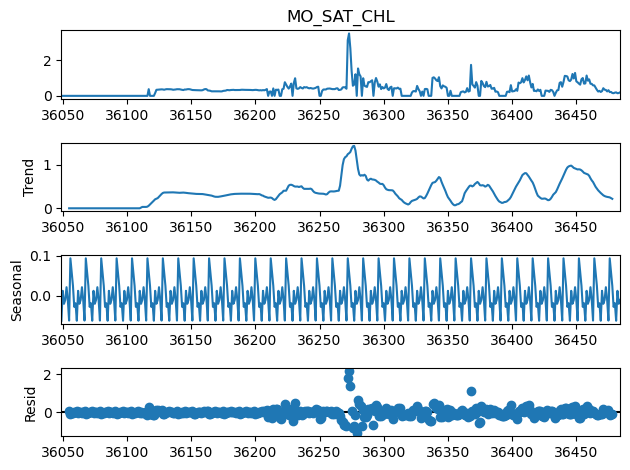

In [36]:
results = seasonal_decompose(satData_subset['MO_SAT_CHL'], period = 12)
_ = results.plot()
plt.show()

In [37]:
satData['month'] = pd.DatetimeIndex(satData['date']).month

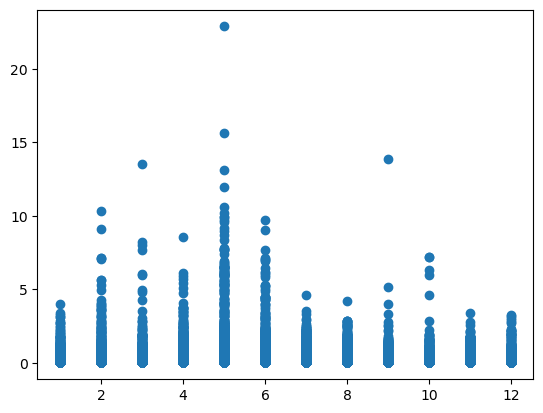

In [38]:
satData = satData.sort_values('month')
plt.scatter(satData['month'], satData['MO_SAT_CHL'])

<AxesSubplot: xlabel='month'>

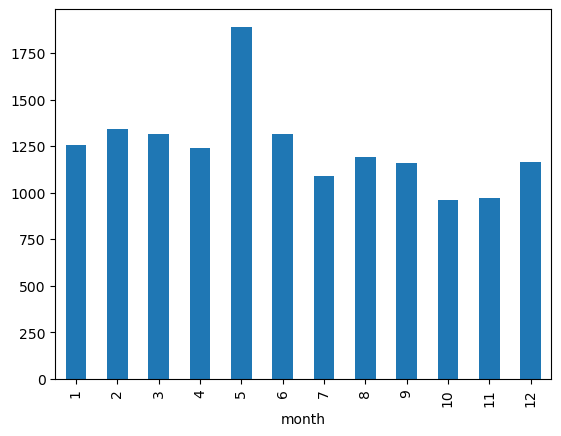

In [39]:
satData[['month','MO_SAT_CHL']].groupby('month').sum().plot(kind='bar', legend=None)

<AxesSubplot: xlabel='month'>

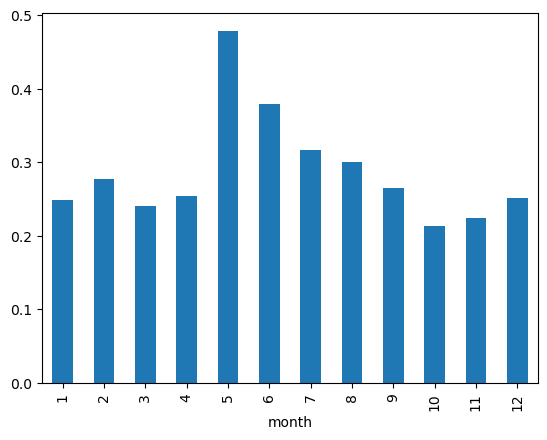

In [40]:
satData[['month','MO_SAT_CHL']].groupby('month').mean().plot(kind='bar', legend=None)

# Satellite and Profile Data

In [10]:
print(sat_profile_combo['latitude'].min())
print(sat_profile_combo['latitude'].max())
print(sat_profile_combo['longitude'].min())
print(sat_profile_combo['longitude'].max())
#Covers the whole globe

-75.647
78.759
-179.985
179.991


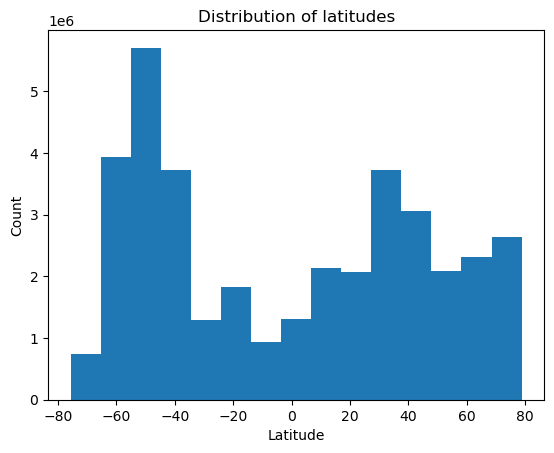

In [18]:
_ = plt.hist(sat_profile_combo['latitude'], bins=15)
_ = plt.title('Distribution of latitudes')
_ = plt.xlabel('Latitude')
_ = plt.ylabel('Count')
plt.show()

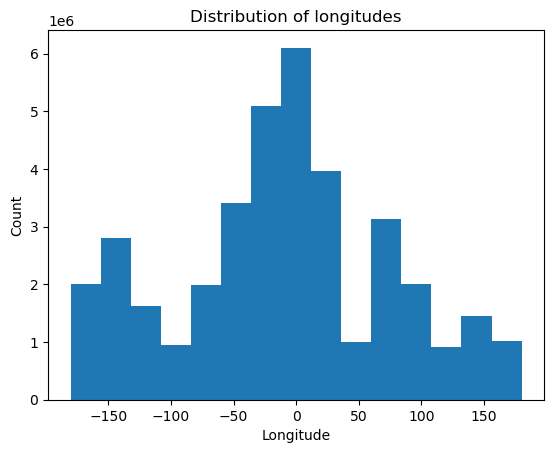

In [17]:
_ = plt.hist(sat_profile_combo['longitude'], bins=15)
_ = plt.title('Distribution of longitudes')
_ = plt.xlabel('Longitude')
_ = plt.ylabel('Count')
plt.show()

In [26]:
#Add month column to look at seasonality
sat_profile_combo['month'] = pd.DatetimeIndex(sat_profile_combo['date_x']).month

<AxesSubplot: xlabel='month'>

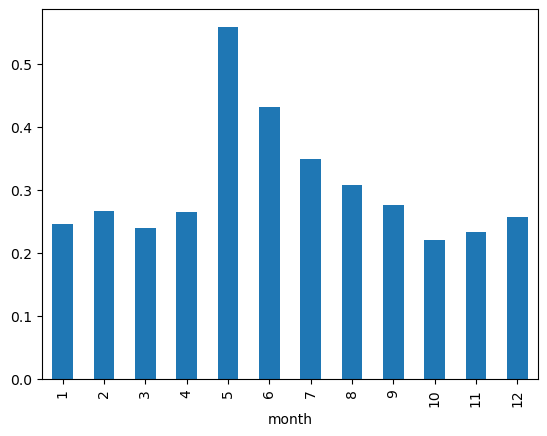

In [27]:
sat_profile_combo[['month','MO_SAT_CHL']].groupby('month').mean().plot(kind='bar', legend=None)

In [30]:
#Bin into symmetrical latitude bins from the equator
sat_profile_combo['lat_bin'] = np.where(abs(sat_profile_combo['latitude'])<10, 1,
                                np.where(abs(sat_profile_combo['latitude'])<20, 2,
                                np.where(abs(sat_profile_combo['latitude'])<30, 3,
                                np.where(abs(sat_profile_combo['latitude'])<40, 4,
                                np.where(abs(sat_profile_combo['latitude'])<50,5,
                                np.where(abs(sat_profile_combo['latitude'])<60,6,
                                np.where(abs(sat_profile_combo['latitude'])<70, 7,
                                8)))))))

6    7437348
5    7109958
4    7021743
7    5256368
2    3435965
3    3149032
1    2475130
8    1583866
Name: lat_bin, dtype: int64


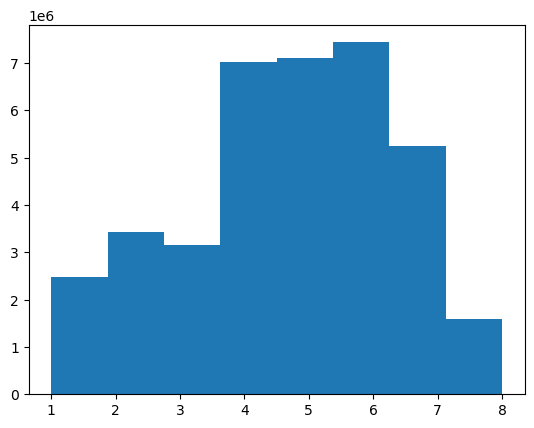

In [36]:
#How many measurements do we have in each latitude bin
print(sat_profile_combo['lat_bin'].value_counts())
_ = plt.hist(sat_profile_combo['lat_bin'], bins=8)
plt.show()

In [46]:
plotting_by_bin = pd.DataFrame(sat_profile_combo[['month','MO_SAT_CHL','lat_bin']].groupby(['month','lat_bin']).mean())

In [47]:
plotting_by_bin = plotting_by_bin.reset_index()
plotting_by_bin.head()

,month,lat_bin,MO_SAT_CHL
0,1,1,0.162244
1,1,2,0.169705
2,1,3,0.099450
3,1,4,0.220484
4,1,5,0.334596


<AxesSubplot: xlabel='month', ylabel='MO_SAT_CHL'>

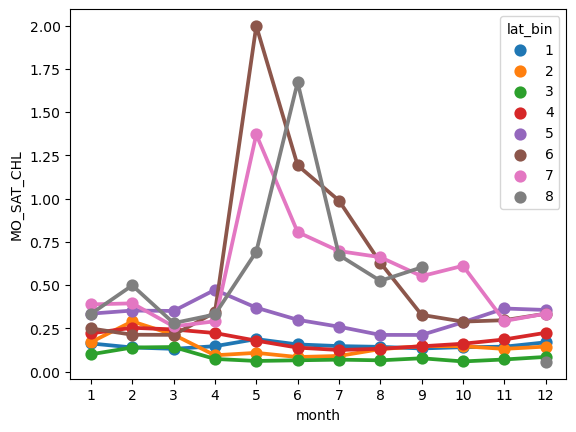

In [55]:
sns.pointplot(x = "month",       # x variable name
            y = "MO_SAT_CHL",       # y variable name
            hue = "lat_bin",  # group variable name
            data = plotting_by_bin)

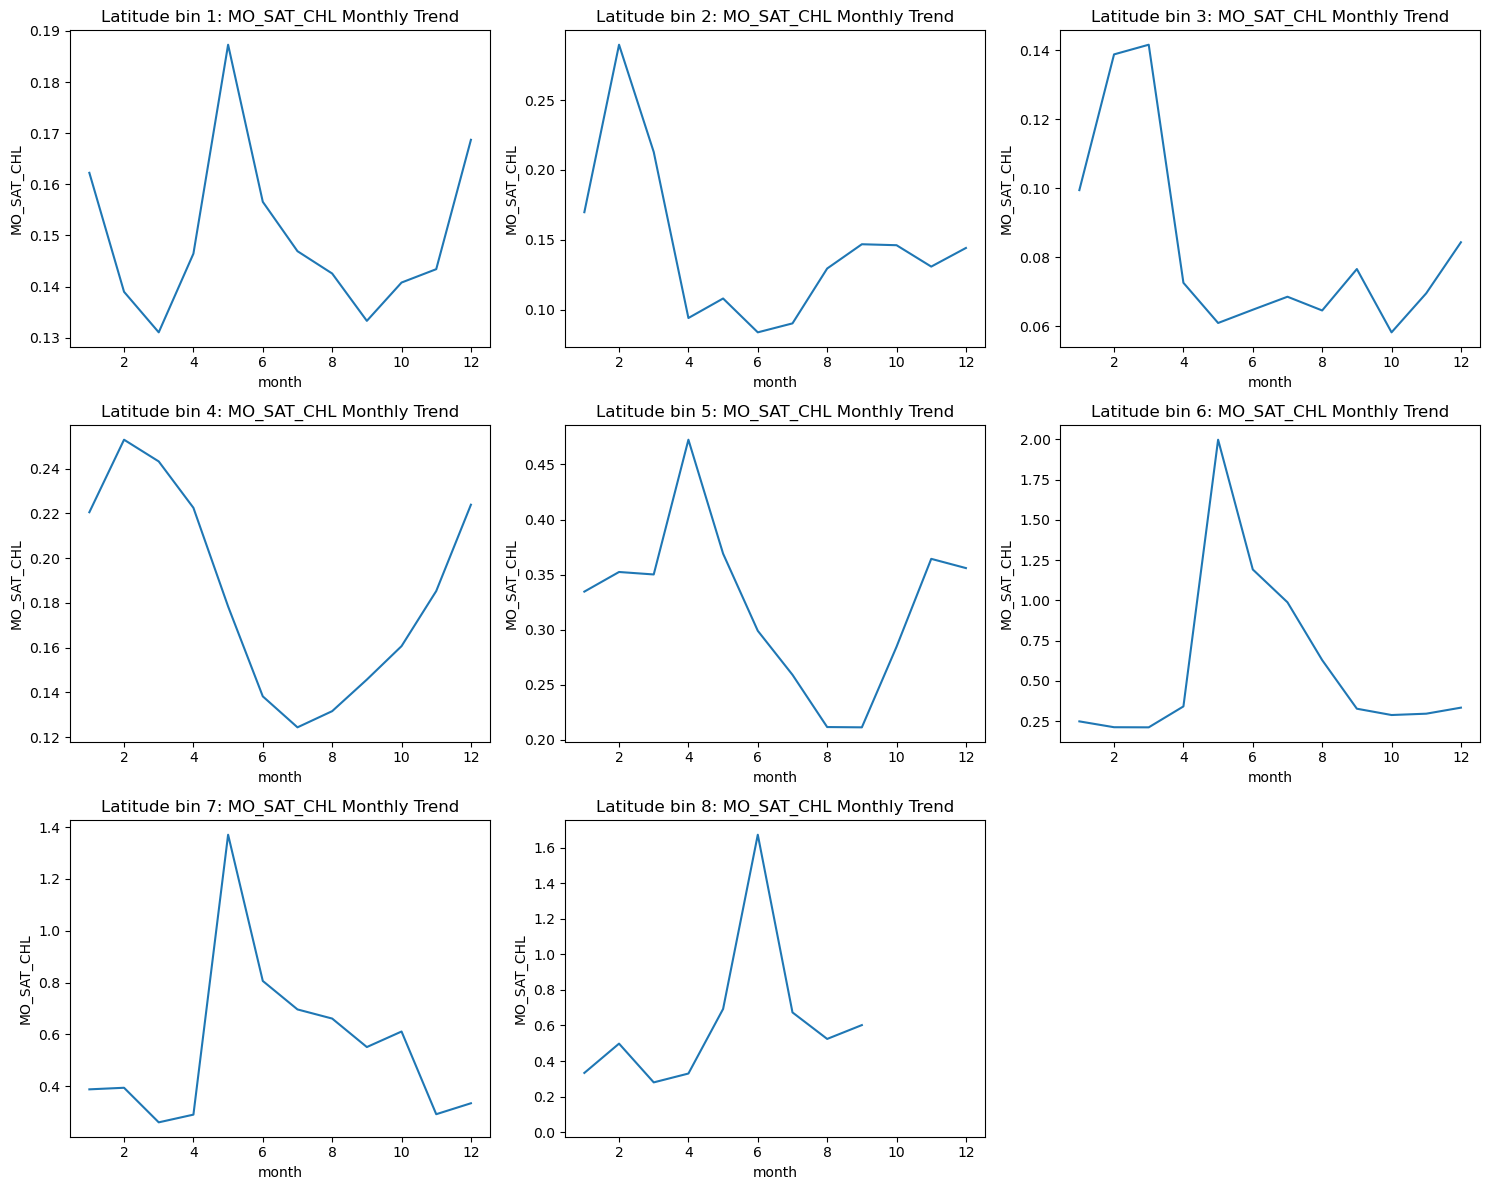

In [59]:
plt.figure(figsize=(15, 12))
for n, lat_bin in enumerate(plotting_by_bin['lat_bin'].unique()):
    plot_df = plotting_by_bin[plotting_by_bin['lat_bin'] == lat_bin]
    plt.subplot(3,3, n + 1)
    plt.plot(plot_df['month'], plot_df['MO_SAT_CHL'])
    plt.title(f'Latitude bin {lat_bin}: MO_SAT_CHL Monthly Trend')
    plt.xlabel('month')
    plt.ylabel('MO_SAT_CHL')
    plt.tight_layout()
_ = plt.show()